<a href="https://colab.research.google.com/github/UlasSen/ConditionDemo/blob/master/Datathon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
dataset= pd.read_csv('ev_fiyatlar.csv')

In [3]:
X= dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=1/3, random_state=0)
X_train

array([[100],
       [200],
       [ 50],
       [250]])

In [5]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((4, 1), (2, 1), (4,), (2,))

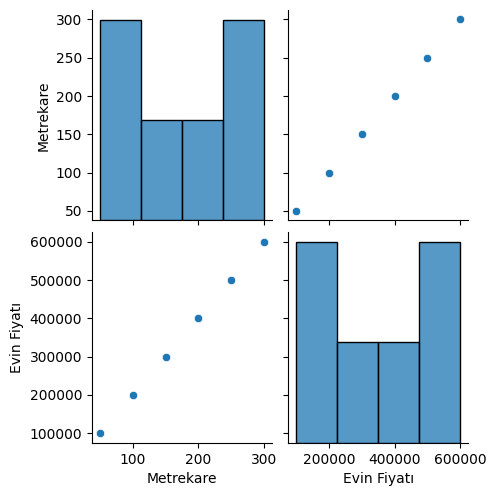

In [6]:
sns.pairplot(dataset)


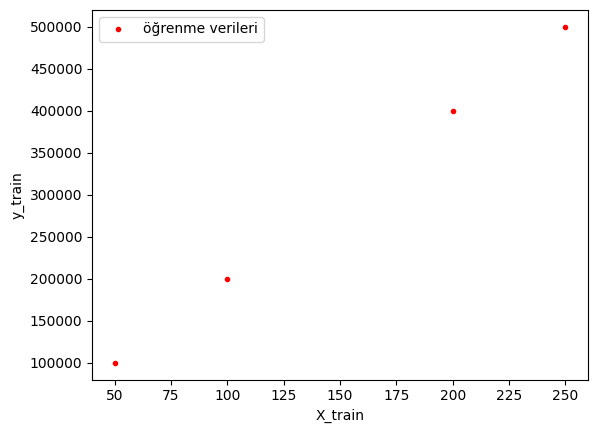

In [7]:
plt.plot(X_train,y_train, 'r.',label='öğrenme verileri')
plt.xlabel('X_train')
plt.ylabel("y_train")
plt.legend()
plt.show()

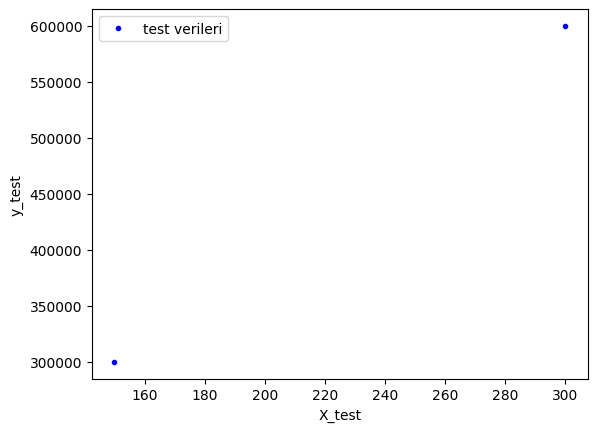

In [8]:
plt.plot(X_test,y_test, 'b.',label='test verileri')
plt.xlabel('X_test')
plt.ylabel("y_test")
plt.legend()
plt.show()

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

kontrol=model.predict(X_test)
doğruluk=accuracy_score(y_test,kontrol)

cm=confusion_matrix(y_test,kontrol)
Evin_metre = 220
y_pred = model.predict([[Evin_metre]])


In [10]:

print(f"{Evin_metre} metrekarelik bir evde bir evin fiyatı: {y_pred[0]:.2f}")
print(f"130 metrekarelik bir evde bir evin fiyatı: {model.predict([[130]])[0]}")
print(f"Doğruluk: {doğruluk:.2f}")
print("Confusion Matrix:")


220 metrekarelik bir evde bir evin fiyatı: 440000.00
130 metrekarelik bir evde bir evin fiyatı: 260000.0
Doğruluk: 1.00
Confusion Matrix:


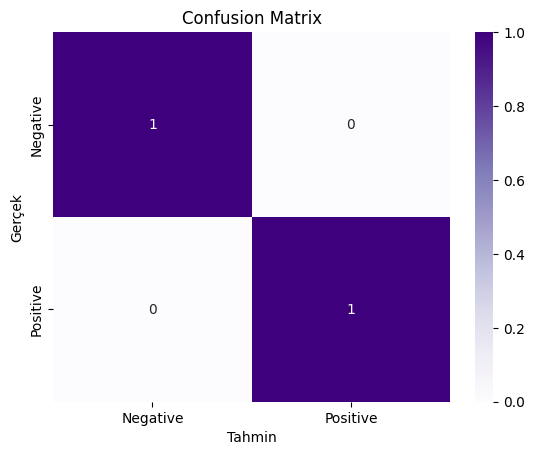

In [11]:
sns.heatmap(cm,annot=True,fmt="d",cmap="Purples",xticklabels=["Negative","Positive"],yticklabels=["Negative","Positive"])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title("Confusion Matrix")
plt.show()